# Анализ интернет-магазина компьютерных игр.
**Описание проекта.**

Заказчик интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Стоит задача выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Описание данных.**

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Просмотр и изучение общей информации.**

In [60]:
#импортируем все необходимые нам библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st

#открываем файл
games = pd.read_csv('/datasets/games.csv')

#смотрим
display(games.head(15))
print(games.info())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


**Вывод** В названиях столбцов мы видим разный регистр, запишем всё в нижнем регистре. Имеются пропуски в столбцах: Name, Genre, Year_of_Release, Critic_Score, User_Score, Rating. В столбце Year_of_Release формат данных float, его необходимо заменить на int.

**Подготовка данных.**

In [61]:
#приводим название столбцов к нижнему регистру
games.columns = games.columns.str.lower()
#смотрим
display(games.head(20))

#меняем тип данных на int, т.к. год может быть только целым числом
games['year_of_release'] = games['year_of_release'].astype('Int64')
print(games.info())

#удаляем пропуски в столбцах name, year_of_release, genre (т.к. пропусков очень мало):
games.dropna(subset=['name', 'genre', 'year_of_release'], inplace=True)

#обревиатура 'tbd' обозначает, что рейтинг пока ещё не установлен, поэтому в столбце
#user_score мы заменим 'tbd' на 'NaN'
#заменить пропуски на 0 мы не можем, т.к. неопределённый рейтинг не равен нулевому и пропусков много
games['user_score'] = games['user_score'].replace('tbd', np.nan, regex=True)

#для дальнейших рассчётов меняем тип object на float в 'user_score'
games['user_score'] = games['user_score'].astype(float)

#проверяем
print(games.info())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             164

In [62]:
#считаем суммарные продажи и добавляем в новый столбец
games['sum_sales'] = games['na_sales'] + games['eu_sales'] + games['other_sales'] + games['jp_sales']
display(games.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


**Вывод**
Новый столбец с суммарными продажами по всем регионам добавлен.

In [63]:
#в столбце rating заменяем пропуски на unknown
games.rating.fillna('unknown', inplace=True)

#проверяем
display(games.head(15))
print(games.info())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown,28.31


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  sum_sales        16444 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.6+ MB
None


**Вывод**
В столбце рейтинг так много пропусков, т.к. ESRB, определяющая рейтинги играм была основана в 1994 году. Соответственно, не всем играм, выпущенным до этого года, присуждался рейтинг. Оценка пользователей и критиков в соответствующих столбцах у части игр пропущенна из-за того, что игры 90х выходили в то время, когда всемирная сеть только набирала популярность и имелись трудности со сбором оценок пользователей и с трансляцией в массы оценок критиков.

**Анализ данных.**

,year_of_release,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


<AxesSubplot:xlabel='year_of_release'>

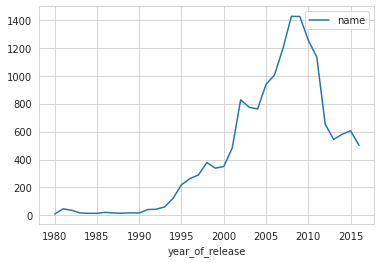

In [64]:
#считаем игры за каждый год
games_year = games.pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index()
display(games_year.head(10))

#строим график
games_year.plot(x='year_of_release', grid=True)

**Вывод**
Мы видим, что до 90х показатели продаж были низкими. С 1992 года начинается постепенный пост продаж. Наибольшее количество игр было выпущено в 2008 году. Начиная с 2009 года объём выпускаимых игр начинает резко снижаться.

,platform,sum_sales
0,2600,86.48
1,3DO,0.10
2,3DS,257.81
3,DC,15.95
4,DS,802.78
5,GB,254.43
6,GBA,312.88
7,GC,196.73
8,GEN,28.35
9,GG,0.04


<AxesSubplot:ylabel='sum_sales'>

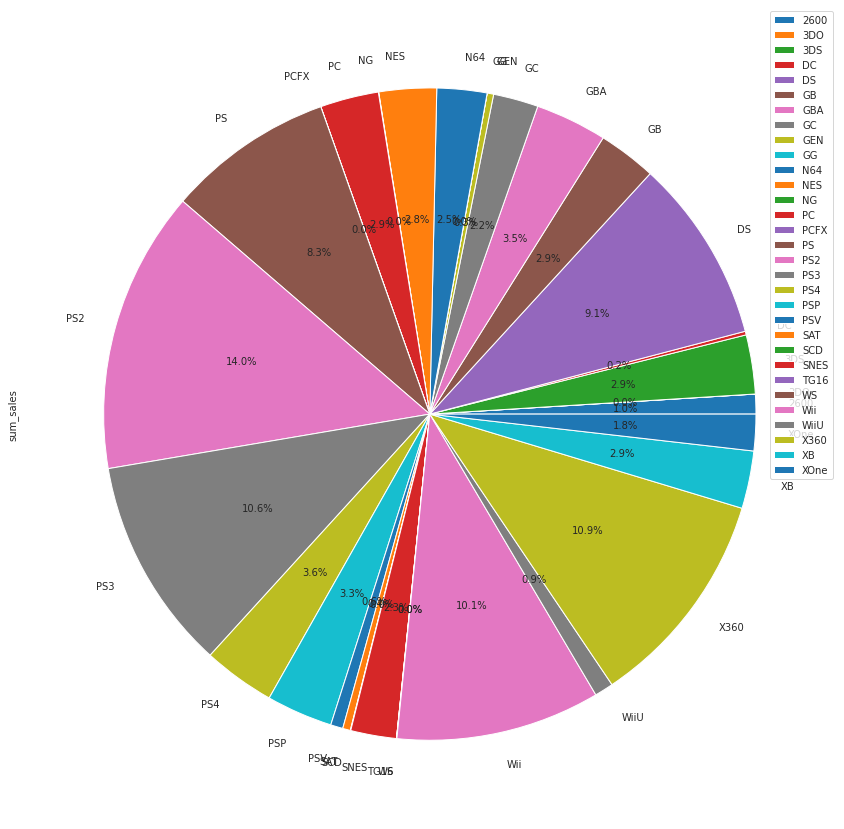

In [65]:
#анализируем платформы по продажам и годам
games_platform  = games.pivot_table(index='platform', values='sum_sales', aggfunc='sum').reset_index()
display(games_platform.head(10))

#строим графики
games_platform.groupby(['platform']).sum().plot(kind='pie', y='sum_sales', figsize=(15, 15), autopct="%1.1f%%")

**Вывод** Наибольшее число продаж мы наблюдаем у PS(8.3% от всех продаж), PS2(14% от всех продаж), PS3(10.6% от всех продаж), Wii(10.1% от всех продаж), X360(10.9% от всех продаж) и DS(9,1% от всех продаж).

,platform,sum_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


<AxesSubplot:xlabel='year_of_release'>

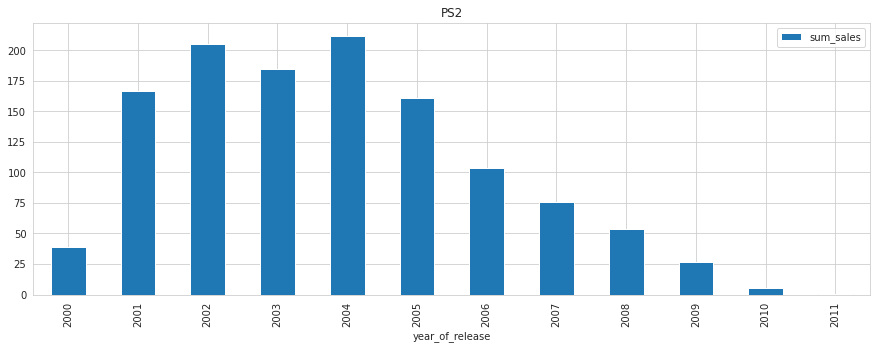

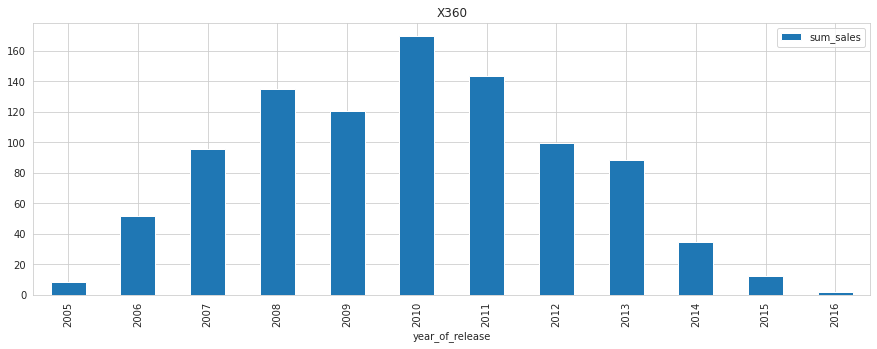

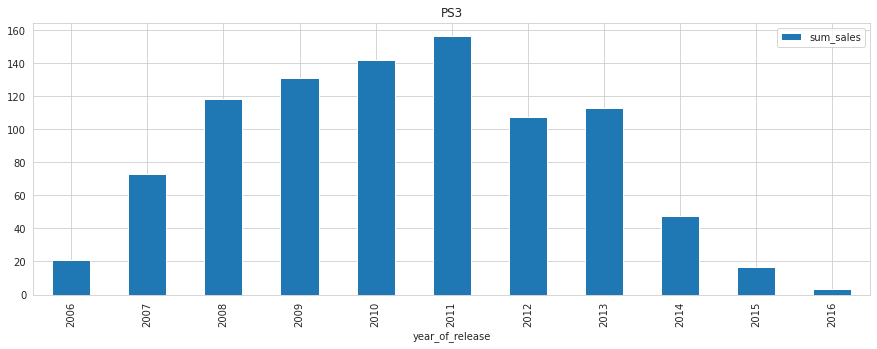

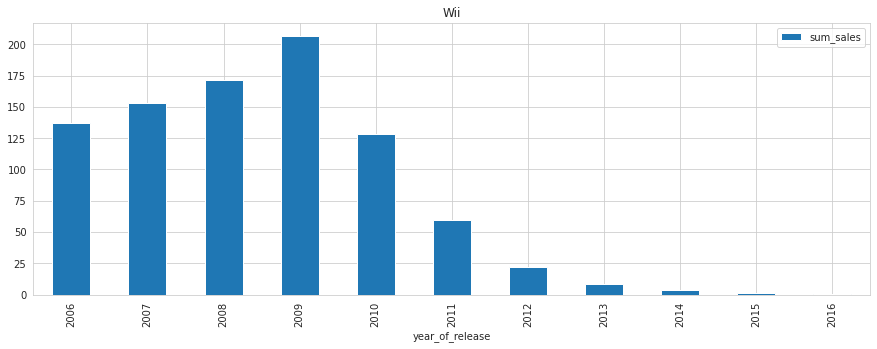

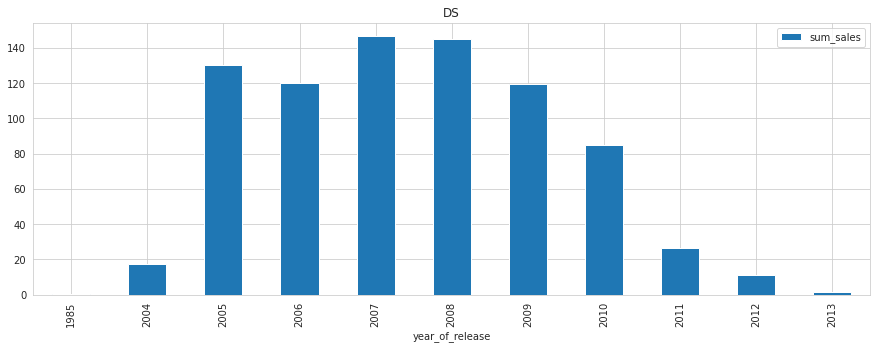

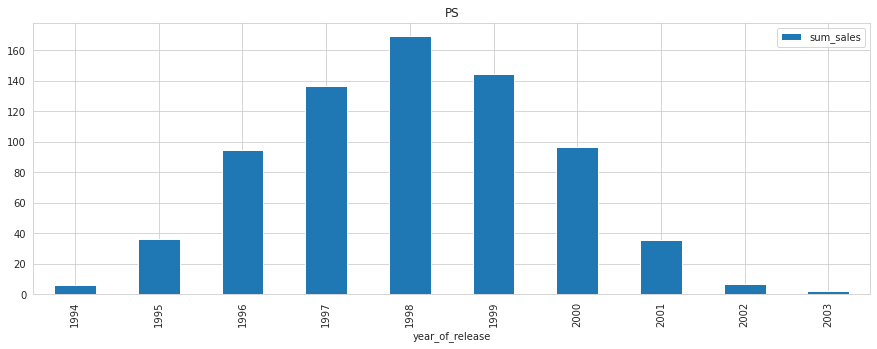

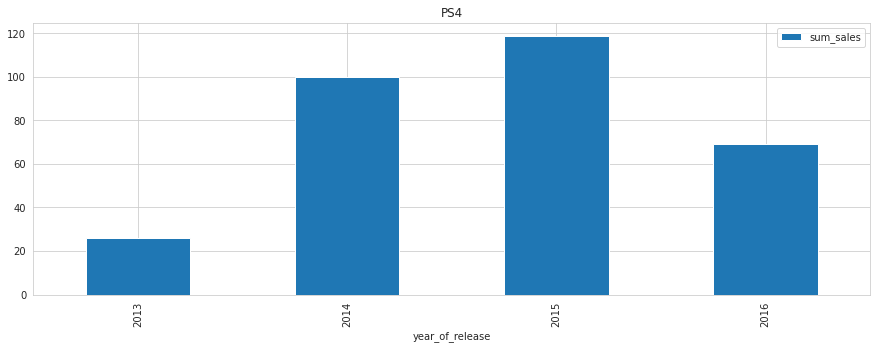

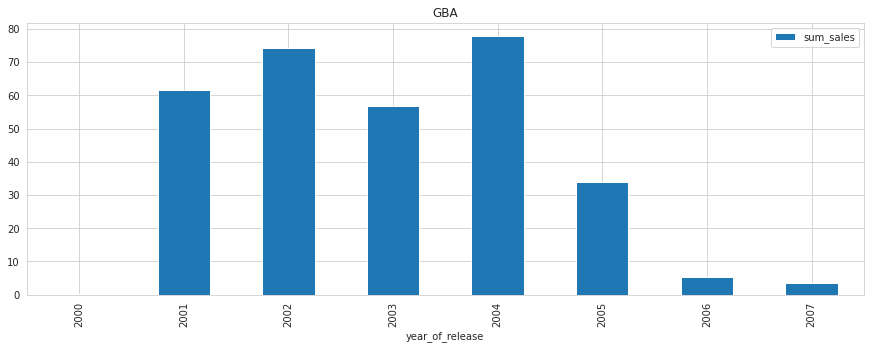

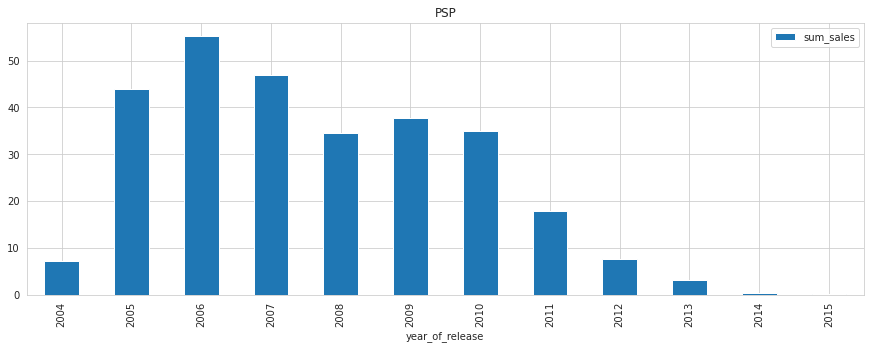

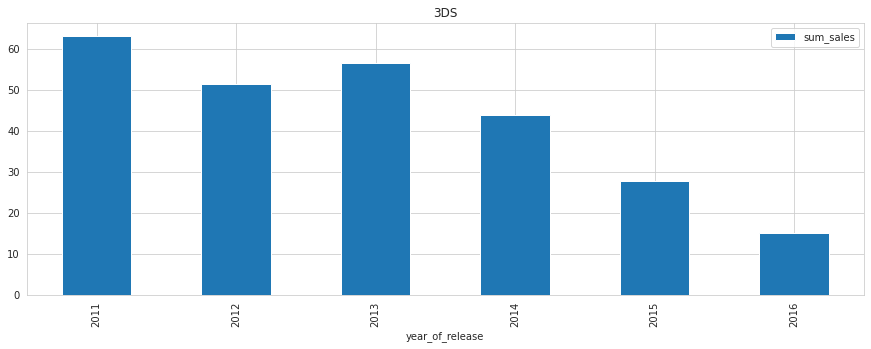

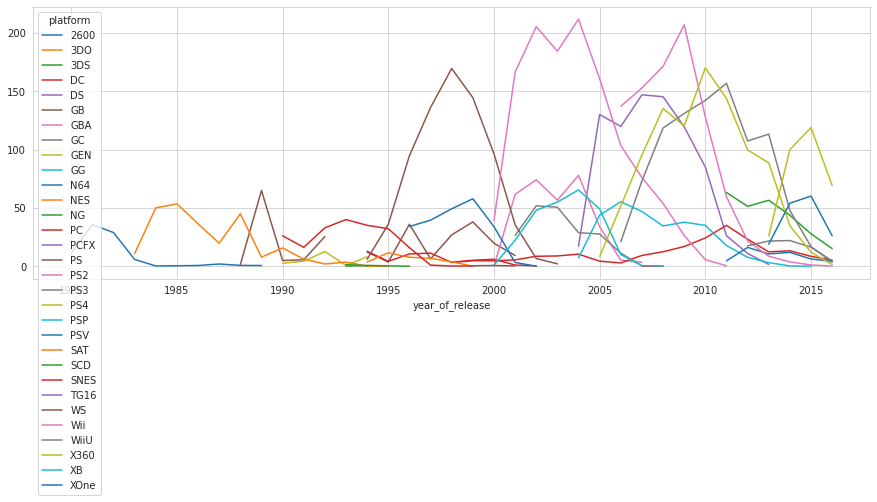

In [66]:
#выделяем платформы с наибольшими продажами
games_platform_new = games.pivot_table(index='platform', values='sum_sales', aggfunc='sum').sort_values(
    by='sum_sales', ascending=False)
games_platform_new = games_platform_new.head(10).reset_index()
display(games_platform_new)

#создаём словарь платформ с наибольшими продажами
top_platforms_dict = games_platform_new['platform'].unique() 
 
#строим графики
for platform in top_platforms_dict:
    games[games['platform'] == platform].pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum').plot(kind='bar', figsize=(15,5))
    plt.title(platform)
    
#строим график для всех платформ с продажами по годам
games.pivot_table(index='year_of_release', columns = 'platform', values='sum_sales', aggfunc='sum').plot(figsize=(15, 5))

**Вывод**
На графиках мы видим, что в среднем характерным сроком, за который появляются новые и исчезают старые платформы, является период длинною в 10 лет. Пик продаж в среднем наступает примерно через 5 лет после выхода платформы. Если брать во внимание то, что мы планируем кампанию на 2017-й, актуальным периодом корректно будет считать временной интервал с 2013 года, т.к. мы видим на графике, что к этому году продажи многих платформ падают, их срок истёк, и появляются новые платформы, продажи которых начинают расти. Из наиболее прибыльных платформ, которые не потеряли актуальность к 2016 году, можно выделить: PS4 и 3DS. 

<AxesSubplot:xlabel='year_of_release'>

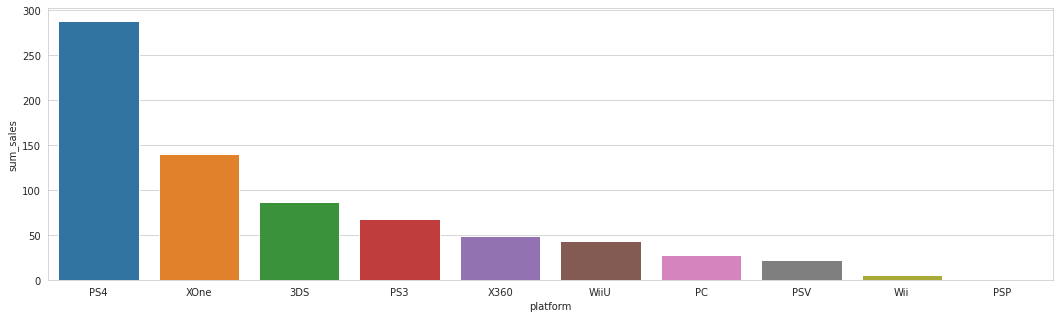

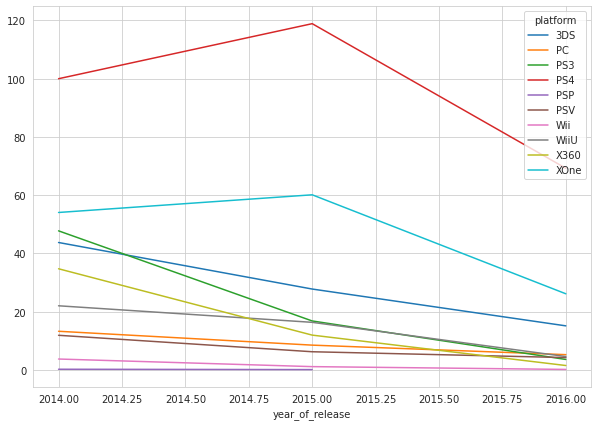

In [67]:
#выделяем актуальный для нас период
actual_period = games.query('year_of_release > 2013')

#внутри данных за актуальный период выбираем платформы с наибольшими продажами, строим график
actual_2016 = actual_period.pivot_table(index=['platform'], values='sum_sales', aggfunc='sum').reset_index().sort_values(by='sum_sales', ascending=False)
sns.set_style('whitegrid')
plt.figure(figsize=(18, 5))
sns.barplot(data = actual_2016, x='platform', y='sum_sales')

#посмотрим на графике распеделение по годам
actual_period.pivot_table(index='platform',
                                                               columns='year_of_release',
                                                               values='sum_sales',
                                                               aggfunc='sum').T.plot(figsize=(10,7))

**Вывод**
На графиках мы видим, что потенциально прибыльными платформами мы можем назвать: PS4, XOne, 3DS, PS3, X360, WiiU. Также мы видим, что самые высокие показатели продаж у XOne и PS4 приходятся на 2015 год, после чего продажи начинают постепенно падать, но на фоне остальных платформ продажи данных платформ всёравно остаются одними из самых высоких. Продажи платформ 3DS, PS3 и X360 также постепенно снижаются из года в год. У платформы WiiU продажи остаются на примерно на одном уровне.

(0.0, 1.6)

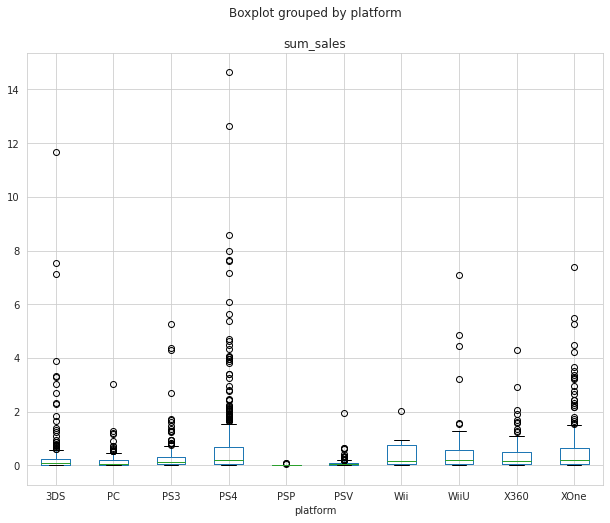

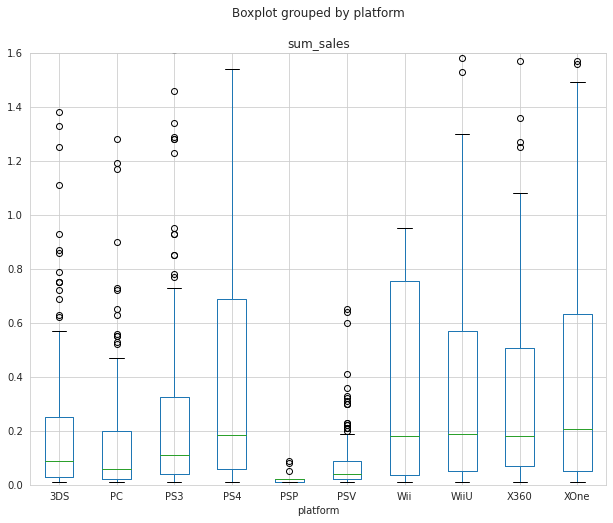

In [68]:
#строим "ящик с усами" в разбивке по платформам за актуальный период
actual_period.boxplot(by='platform', column='sum_sales', figsize=(10,8))

actual_period.boxplot(by='platform', column='sum_sales', figsize=(10,8))
plt.ylim([0, 1.6])

**Вывод** На графике мы видим, что самое высокое медианное значение продаж у платформ: XOne, PS4, WiiU, затем с небольшим отставанием по медианному значению идут Wii и X360. Самые большие продажи у PS4, затем XOne, после идет WiiU, далее X360 и Wii. У остальных платформ продажи значительно ниже. Мы можем также отметить, что у PS4, XOne и 3DS имеется большое количество выбросов со значительным размахом, это можно объяснить успешными продажами отдельных игр у каждой из данных платформ.

**Как влияют на продажи платформы отзывы пользователей и критиков.**

In [69]:
#выделяем самые продаваемые платформы
most_popular = games.groupby('platform').sum()['sum_sales'].sort_values(ascending=False).index.values[:10]

#выделяем актуальный период
popular = actual_period[actual_period.platform.isin(most_popular)]

#группируем
grouped_by_platform = popular.groupby('platform').sum()


#создаём список самых продаваемых платформ
popular_platforms_list = grouped_by_platform.index.values
print('Список платформ:', popular_platforms_list)

#считаем корреляцию между оценками критиков и продажами
print('Кореляция между оценкой критиков и продажами:')
for platform in popular_platforms_list:
    print(f'Платформа: {platform}, Уровень корреляции:', popular[popular['platform']==platform].corr().loc['critic_score', 'sum_sales'])
print('')
    
#считаем корреляцию между оценками пользователей и продажами
print('Корреляции между оцнками пользователей и продажами:')
for platform in popular_platforms_list:
    print(f'Платформа: {platform}, Уровень корреляции:', popular[popular['platform']==platform].corr().loc['user_score', 'sum_sales'])

Список платформ: ['3DS' 'PS3' 'PS4' 'PSP' 'Wii' 'X360']
Кореляция между оценкой критиков и продажами:
Платформа: 3DS, Уровень корреляции: 0.3141174928690515
Платформа: PS3, Уровень корреляции: 0.44657460493190787
Платформа: PS4, Уровень корреляции: 0.40266141068104144
Платформа: PSP, Уровень корреляции: nan
Платформа: Wii, Уровень корреляции: nan
Платформа: X360, Уровень корреляции: 0.5257228356581523

Корреляции между оцнками пользователей и продажами:
Платформа: 3DS, Уровень корреляции: 0.21519327185270265
Платформа: PS3, Уровень корреляции: -0.16676141347662113
Платформа: PS4, Уровень корреляции: -0.04013158947269716
Платформа: PSP, Уровень корреляции: nan
Платформа: Wii, Уровень корреляции: 1.0
Платформа: X360, Уровень корреляции: -0.13844457094566498


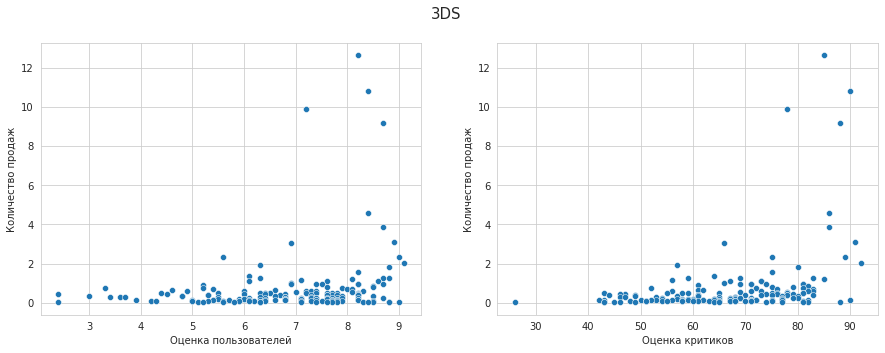

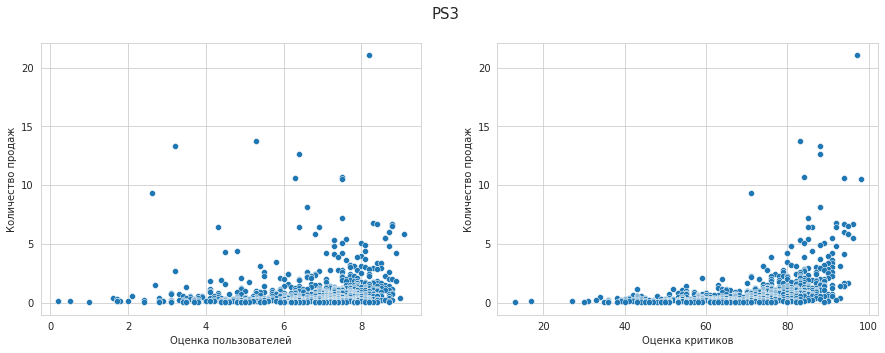

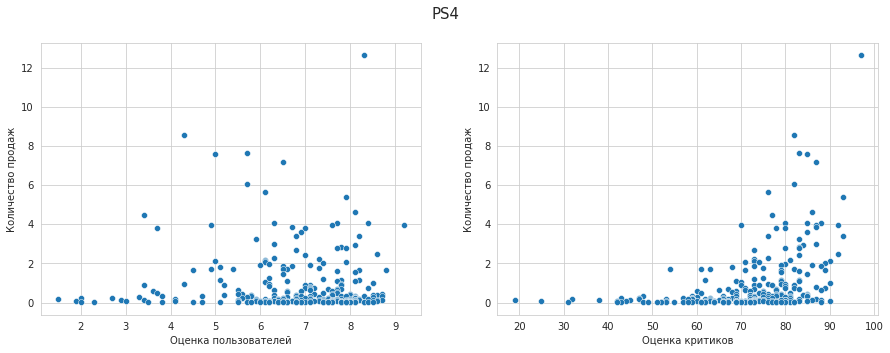

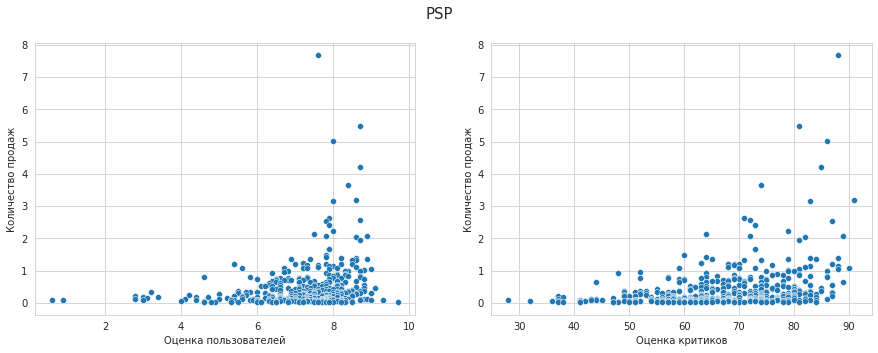

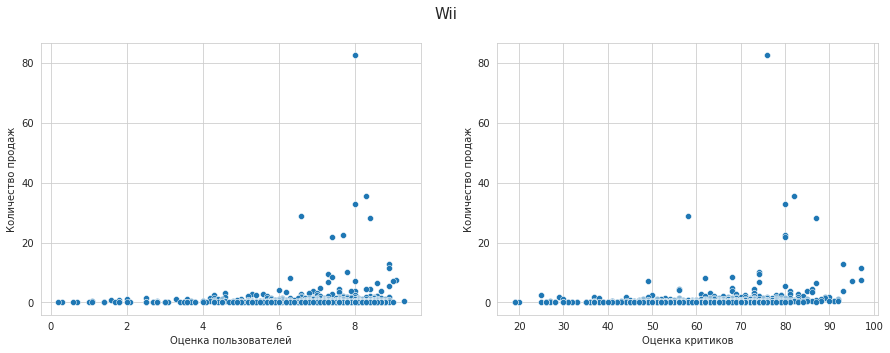

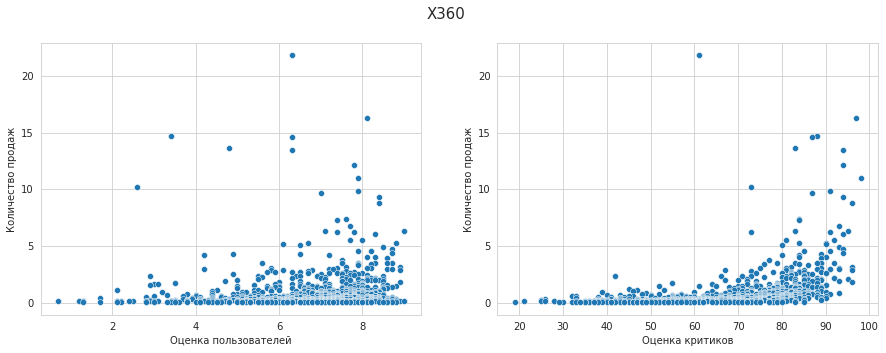

In [70]:
#строим диаграммы рассеяния
def charts_platform(name_of_platform):
    platform = games[games['platform']==name_of_platform]
    fig, ax = plt.subplots(1 ,2, figsize=(15,5))
    sns.scatterplot(x='user_score', y='sum_sales', data=platform, ax=ax[0])
    sns.scatterplot(x='critic_score', y='sum_sales', data=platform, ax=ax[1])
    fig.suptitle(name_of_platform, fontsize=15)
    ax[0].set(xlabel='Оценка пользователей')
    ax[1].set(xlabel='Оценка критиков')
    ax[0].set(ylabel='Количество продаж')
    ax[1].set(ylabel='Количество продаж')
    plt.show()
    
for platform in popular_platforms_list:
    charts_platform(platform)

**Вывод**
На графиках и по отрицательному, близкому к нулю, уровню корреляции мы видим, что на продажи большенства платформ не влияет оценка пользователей, за исключением платформы Wii. Также на графиках и по положительному уровню корреляции заметно, что чем выше оценка критиков, тем выше продажи.

**Распределение игр по жанрам.**

genre
Shooter         0.620
Sports          0.315
Role-Playing    0.150
Platform        0.145
Racing          0.145
Fighting        0.130
Simulation      0.130
Action          0.110
Misc            0.080
Adventure       0.060
Puzzle          0.060
Strategy        0.060
Name: sum_sales, dtype: float64

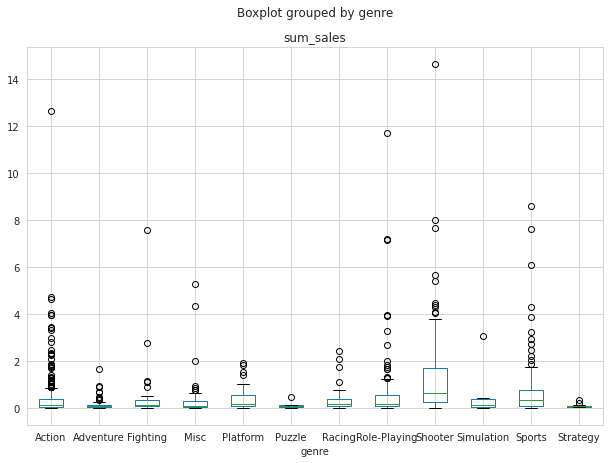

In [71]:
#строим график
popular.boxplot(by='genre', column='sum_sales', figsize=(10,7))

#сравним медианы
popular.groupby('genre').median()['sum_sales'].sort_values(ascending=False)

**Вывод**
По продажам лидируют жанры Shooter и Sports. У Action имеется большое количество выбросов с большим размахом, из чего мы можем сделать вывод, что отдельные игры жанра Action также являются прибыльными.

**Портрет пользователя каждого региона.**

platform
PS4     0.262261
X360    0.254955
Wii     0.189091
3DS     0.106792
PS3     0.100685
Name: na_sales, dtype: float64
platform
PS4     0.345851
Wii     0.235455
X360    0.139550
PS3     0.116621
3DS     0.076038
Name: eu_sales, dtype: float64
platform
3DS     0.208679
PS3     0.051233
PS4     0.039947
PSP     0.027692
X360    0.000721
Name: jp_sales, dtype: float64


<AxesSubplot:xlabel='platform'>

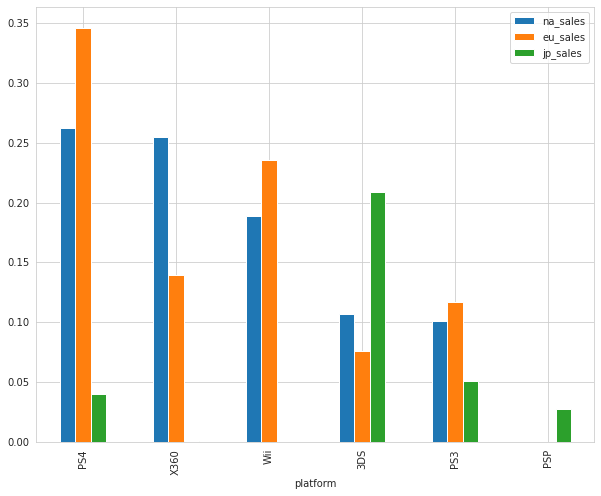

In [72]:
#смотрим самые популярные платформы в Северной Америке
na_popular_platforms = popular.groupby('platform').na_sales.mean().sort_values(ascending=False)[:5]
print(na_popular_platforms)

#смотрим самые популярные платформы в Европе
eu_popular_platforms = popular.groupby('platform').eu_sales.mean().sort_values(ascending=False)[:5]
print(eu_popular_platforms)

#смотрим самые популярные платформы в Японии
jp_popular_platforms = popular.groupby('platform').jp_sales.mean().sort_values(ascending=False)[:5]
print(jp_popular_platforms)

#строим общую таблицу
all_popular_platforms = pd.DataFrame(data=[na_popular_platforms,eu_popular_platforms, jp_popular_platforms]).T
all_popular_platforms

#строим график
all_popular_platforms.plot(kind='bar',figsize=(10,8))

**Вывод**
Самая популярная платформа в Северной Америке и Европе - PS4, а в Японии - 3DS. При этом в Америке практически одинаково популярны PS4 и X360.

genre
Shooter         0.617463
Sports          0.306827
Role-Playing    0.192937
Fighting        0.175682
Platform        0.163182
Name: na_sales, dtype: float64
genre
Shooter         0.658806
Sports          0.349615
Racing          0.227647
Platform        0.190909
Role-Playing    0.166746
Name: eu_sales, dtype: float64
genre
Role-Playing    0.207937
Simulation      0.113500
Fighting        0.111818
Puzzle          0.073333
Action          0.067847
Name: jp_sales, dtype: float64


<AxesSubplot:xlabel='genre'>

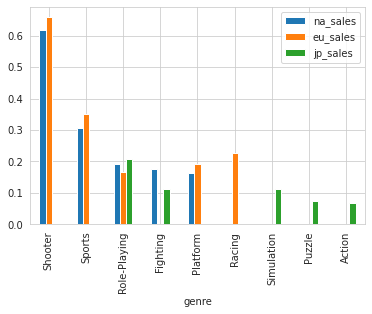

In [73]:
#смотрим cамые популярные жанры в Северной Америке
na_popular_genres = popular.groupby('genre').na_sales.mean().sort_values(ascending=False)[:5]
print(na_popular_genres)

#смотрим самые популярные жанры в Европе
eu_popular_genres = popular.groupby('genre').eu_sales.mean().sort_values(ascending=False)[:5]
print(eu_popular_genres)

#смотрим самые популярные жанры в Японии
jp_popular_genres = popular.groupby('genre').jp_sales.mean().sort_values(ascending=False)[:5]
print(jp_popular_genres)

#строим график по всем странам
all_popular_genres = pd.DataFrame(data=[na_popular_genres,eu_popular_genres, jp_popular_genres]).T
all_popular_genres.plot(kind='bar')

**Вывод**
Самый популярный жанр в Америке и Европе - Shooter, а в Японии - Role-Playing.

rating
AO            1.26
E          1274.24
E10+        345.50
EC            1.53
K-A           2.56
M           742.89
RP            0.00
T           747.60
unknown    1225.84
Name: na_sales, dtype: float64
rating
AO           0.61
E          703.87
E10+       183.35
EC           0.11
K-A          0.27
M          480.00
RP           0.03
T          421.79
unknown    609.65
Name: eu_sales, dtype: float64
rating
AO           0.00
E          197.96
E10+        40.20
EC           0.00
K-A          1.46
M           63.58
RP           0.00
T          150.70
unknown    836.74
Name: jp_sales, dtype: float64


<AxesSubplot:>

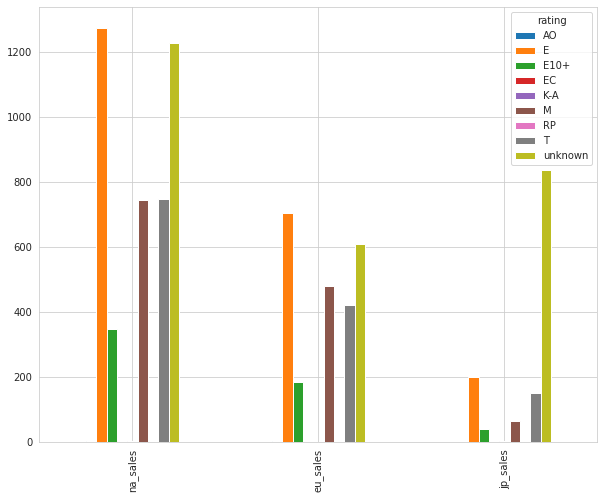

In [74]:
#смотрим влияние рейтинга ESRB на продажи

#в Америке
na_popular_ratings = games.groupby('rating').sum().na_sales
print(na_popular_ratings)

#в Европе
eu_popular_ratings =  games.groupby('rating').sum().eu_sales
print(eu_popular_ratings)

#в Японии
jp_popular_ratings = games.groupby('rating').sum().jp_sales
print(jp_popular_ratings)

#строим график по всем странам
all_popular_ratings = pd.DataFrame([na_popular_ratings, eu_popular_ratings, jp_popular_ratings])
all_popular_ratings.plot(kind='bar', figsize=(10,8))

**Вывод**
В Америке, Европе и Японии наиболее популярны игры с рейтингом «E» («Everyone») — «Для всех»: подходит для возрастной категории старше 6 лет. Также на графике видно, что у большой части игр рейтинг неопределён, а в Японии количество игр с неопределённым рейтингом превышает количество игр с известным нам рейтингом.

**Проверка гипотез.**

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Нулевая гипотеза H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.


Альтернативная гипотеза H₁: Средние пользовательские рейтинги платформ Xbox One и PC различаются.

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sum_sales
platform,,,,,,,,
3DS,2015.0,0.00,0.00,0.055,0.00,69.0,7.40,0.090
PC,2015.0,0.00,0.05,0.000,0.00,77.0,6.80,0.060
PS3,2015.0,0.02,0.01,0.020,0.01,67.0,6.55,0.110
PS4,2015.0,0.05,0.07,0.015,0.02,73.0,7.10,0.185
PSP,2014.0,0.00,0.00,0.020,0.00,NaN,NaN,0.020
PSV,2015.0,0.00,0.00,0.030,0.00,72.0,7.80,0.040
Wii,2014.0,0.04,0.12,0.000,0.01,NaN,6.35,0.180
WiiU,2015.0,0.09,0.06,0.010,0.02,73.0,7.10,0.190
X360,2014.0,0.10,0.05,0.000,0.02,67.0,6.00,0.180


<AxesSubplot:xlabel='platform'>

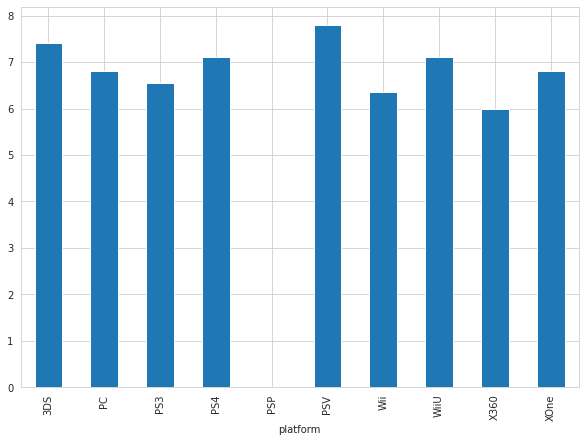

In [75]:
#смотрим средние пользовательский рейтинги для xbox и PC за актуальный период
display(actual_period.groupby('platform').median())

#строим график
actual_period.groupby('platform').median().user_score.plot(kind='bar', figsize=(10,7), grid=True)

In [76]:
#смотрим дисперсии
a = actual_period.loc[actual_period['platform']=='XOne'].user_score.dropna().values
b = actual_period.loc[actual_period['platform']=='PC'].user_score.dropna().values

print(np.var(a))
print(np.var(b))

1.8795460055096425
2.8773743617307175


Генеральные совокупности независимы  друг от друга. Средние распределены нормально. Дисперсии не равны, поэтому добавим equal_var = False. Критический уровень статистической значимости задаём 0.01. Считаем:

In [77]:
alpha = 0.01

results = st.ttest_ind(a, b, equal_var = False)
print('P-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу.")
else:
    print("Не получилось отвергнуть нулевую гипотезу.")

P-value: 0.11601398086668827
Не получилось отвергнуть нулевую гипотезу.


**Вывод**
Мы принимаем нулевую гипотизу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. P-value говорит нам о том, вероятность случайного совпадения средних наших выборок велика. Из этого следует, что альтернативная гипотеза о том, что средние указанных выборок отличаются, отвергается.

2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Нулевая гипотеза H₀: Средние пользовательские рейтинги жанров Action и Sports одинаковые.

Альтернативная гипотеза H₁: Средние пользовательские рейтинги жанров Action и Sports различаются.

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sum_sales
genre,,,,,,,,
Action,2015.0,0.010,0.020,0.01,0.010,72.0,7.10,0.090
Adventure,2015.0,0.000,0.000,0.01,0.000,72.0,7.50,0.030
Fighting,2015.0,0.040,0.020,0.03,0.010,71.0,7.40,0.125
Misc,2015.0,0.010,0.010,0.01,0.000,76.0,7.00,0.090
Platform,2015.0,0.075,0.055,0.00,0.020,78.0,7.20,0.140
Puzzle,2014.5,0.000,0.000,0.03,0.000,75.5,7.95,0.045
Racing,2015.0,0.030,0.050,0.00,0.010,71.0,6.40,0.090
Role-Playing,2015.0,0.020,0.010,0.05,0.010,75.0,7.60,0.110
Shooter,2015.0,0.220,0.220,0.00,0.055,78.0,6.85,0.515


<AxesSubplot:xlabel='genre'>

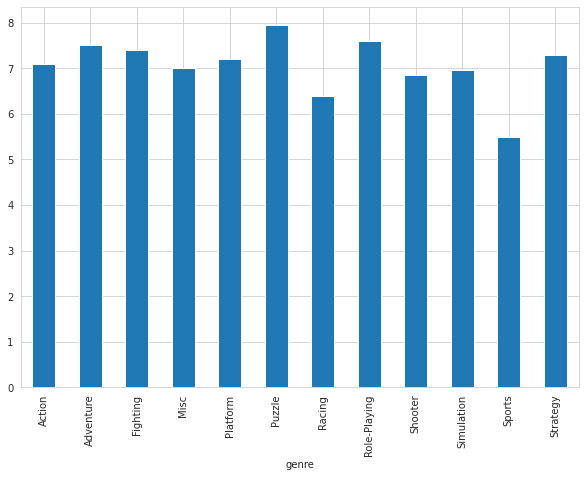

In [78]:
#смотрим средние
display(actual_period.groupby('genre').median())

#строим график
actual_period.groupby('genre').median().user_score.plot(kind='bar', figsize=(10,7), grid=True)

In [79]:
#смотрим дисперсии

c = actual_period.loc[actual_period['genre']=='Action'].user_score.dropna().values
d = actual_period.loc[actual_period['genre']=='Sports'].user_score.dropna().values

print(np.var(c))
print(np.var(d))

1.89208448117539
3.4198375596751185


Генеральные совокупности независимы друг от друга. Средние распределены нормально. Дисперсии не равны, поэтому добавим equal_var = False. Критический уровень статистической значимости задаём 0.01. Считаем:

In [80]:
alpha = 0.01

results = st.ttest_ind(c, d, equal_var = False)
print('P-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу.")
else:
    print("Не получилось отвергнуть нулевую гипотезу.")

P-value: 1.1825550382644557e-14
Отвергаем нулевую гипотезу.


**Вывод**
Мы отвергаем нулевую гипотизу о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые. P-value говорит нам о том, вероятность случайного совпадения средних наших выборок ничтожно мала. Из этого следует, что альтернативная гипотеза о том, что средние указанных выборок отличаются, не отвергается.

**Общий вывод.**

**Проведена работа:**
были найдены и исправлены ошибки в данных; произведена замена типа данных там, где это необходимо; произведены рассчёты и добавлены в таблицу необходимые данные(суммарные продажи во всех регионах); был проведён анализ выпуска игр по годам и изменения продаж по платформам; был выделен актуальный период для анализа продаж на следующий год; был произведён анализ продаж наиболее прибыльных платформ; было изучено влияние отзывов пользователей и критиков на продажи; были выявлены самые прибыльные жанры; был составлен портрет пользователя каждого региона; построены графики для наглядности и дополнительных выводов; проверены гипотезы. 

**Основываясь на полученных данных можно прийти к следующему выводу:**
Потенциально прибыльными платформами в 2017 году мы можем назвать: PS4, XOne, 3DS, PS3, X360, WiiU. У перечисленных платформ постепенно падают продажи, поэтому высокие показатели продаж данных платформ можно прогнозировать только на 2017 год. Оценка критиков имеет влияние на продажи - чем выше оценка критиков, тем выше показатели продаж. Потенциально прибыльными жанрами в 2017 году в Америке и Европе мы можем назвать Shooter и Sports, а также отдельные игры жанра Action могут принести высокий доход. В Японии больше продаж будет жанра Role-Playing. Для получения большей прибыли в Северной Америке более перспективными будут продажи платформ PS4 и X360, в Европе продажи платформы PS4, а в Японии - платформы 3DS. По имеющимся данным можно сказать, что в Европе и Америке большую прибыль в 2017 году принесут игры с рейтингом «E» («Everyone») — «Для всех», для возрастной категории старше 6 лет. Следует также добавить, что для объективного выявления наиболее популярного рейтинга ESRB в Японии недостаточно данных. Также было выявлено, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, а средние пользовательские рейтинги жанров Action и Sports различаются, у жанра Action они выше.

**Рекомендации:** Дополнительный анализ может помочь лучше спланировать рекламную кампанию на следующий год. Например, можно изучить связь продаж с уровнем экономического развития регионов, можно проанализировать успешность отдельных игр.